<a href="https://colab.research.google.com/github/iamsonia9/Web_scrap/blob/main/Assignment10(Sonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 names = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'] )
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.drop('Id number',axis=1, inplace=True)

In [4]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [5]:
X = df.iloc[:,0:9]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [6]:
cols = X.columns

In [7]:
y = df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


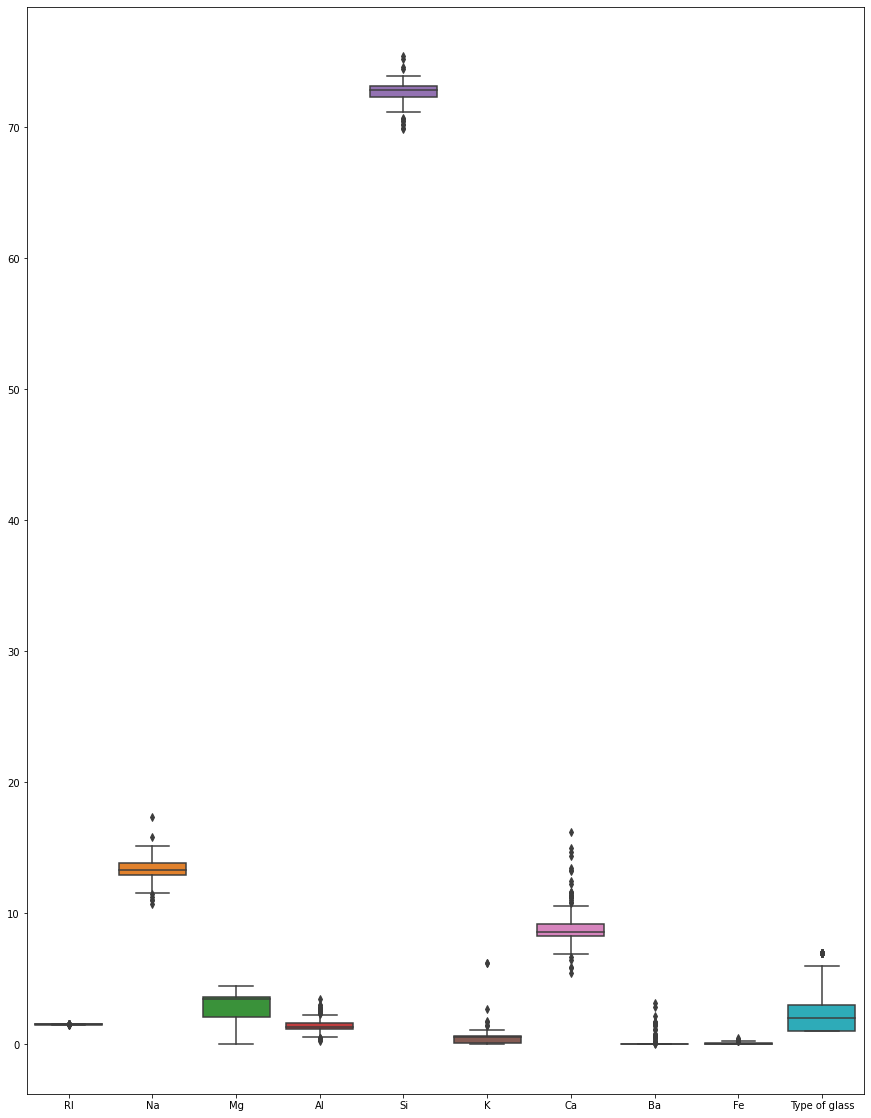

In [10]:
fig = plt.figure(figsize=(15,20))
sns.boxplot(data=df)

In [11]:
df_cap = df.copy()

In [12]:
def iqr_capping(df, cols, factor):
  for col in cols:
    q1 =  df[col].quantile(0.25)
    q3 =  df[col].quantile(0.75)
    iqr = q3-q1

    upper_limit = q3 + (factor * iqr)
    lower_limit = q1 - (factor * iqr)

    df[col]=np.where(df[col]>upper_limit,upper_limit,
    np.where(df[col]< lower_limit,lower_limit,df[col]))





In [13]:
iqr_capping(df_cap,X, 1.5)

In [14]:
df.shape

(214, 10)

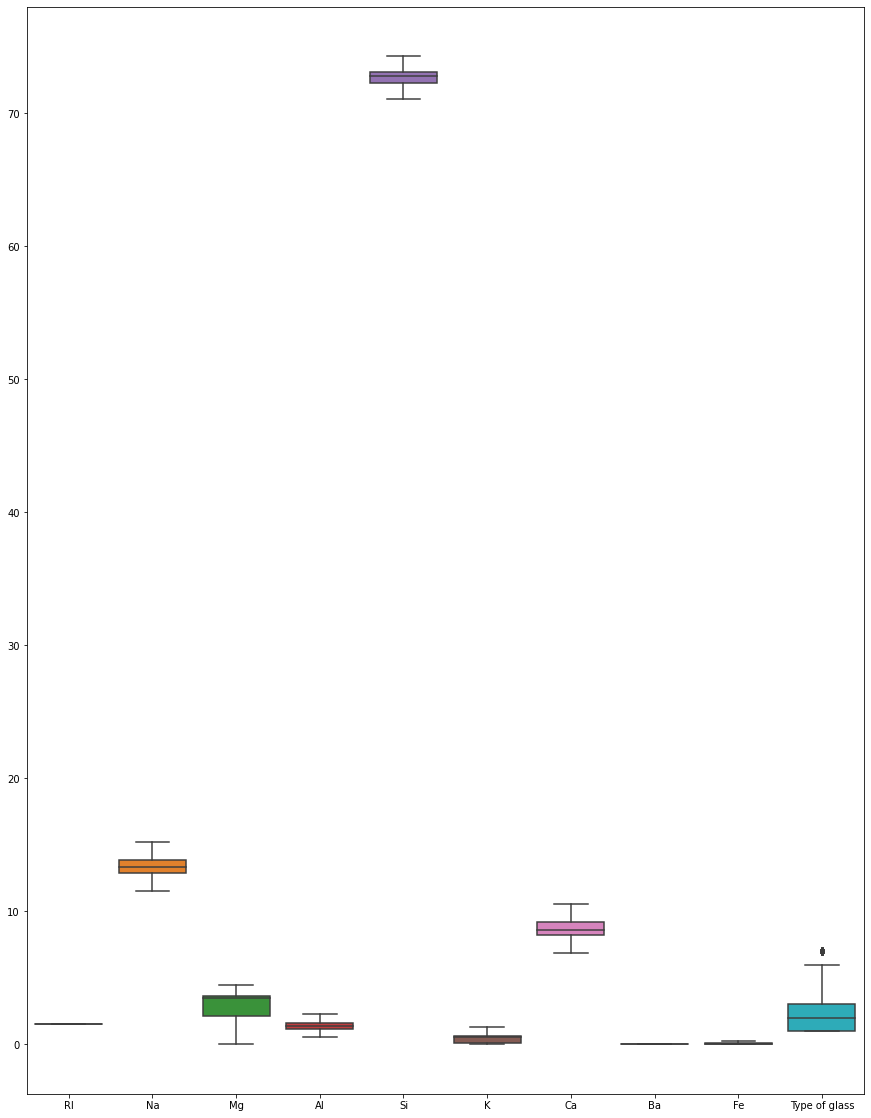

In [15]:
fig = plt.figure(figsize=(15,20))
sns.boxplot(data=df_cap)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
sc.mean_

array([1.51841444e+00, 1.34318713e+01, 2.68409357e+00, 1.43602339e+00,
       7.26303509e+01, 5.08011696e-01, 8.96315789e+00, 1.67076023e-01,
       5.02923977e-02])

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
X_train_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.193681,-0.940943,0.686414,-0.538344,0.640241,0.142650,-0.182475,-0.355476,-0.555806
1,-0.176823,-0.302694,0.846546,-0.265294,-0.400911,0.058729,-0.362761,-0.355476,2.538611
2,-0.520728,-0.252636,0.595904,0.085770,0.279842,0.072715,-0.598519,-0.355476,-0.555806
3,-0.355518,-0.815796,0.651602,-0.284798,0.213101,0.114676,-0.182475,-0.355476,-0.555806
4,-0.841031,-0.715679,0.581980,1.333999,0.039576,0.254545,-0.688662,-0.355476,-0.555806
...,...,...,...,...,...,...,...,...,...
166,1.047075,-0.477900,0.672489,-1.103948,-0.414259,-0.444799,0.614942,-0.355476,1.322947
167,-0.736511,0.961288,-1.868735,2.640739,1.107424,-0.654603,0.053283,0.495576,0.438828
168,-0.449924,0.360584,0.693376,0.729388,-0.761310,0.184611,-0.751068,-0.355476,-0.555806
169,2.783458,0.698480,0.707300,-1.416006,-1.415367,-0.682577,0.594139,-0.355476,0.549343


In [21]:
np.round(X_train_scaled.describe(),1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0,171.0
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-3.0,-1.9,-2.2,-3.7,-0.7,-2.4,-0.4,-0.6
25%,-0.6,-0.6,-0.4,-0.5,-0.5,-0.5,-0.5,-0.4,-0.6
50%,-0.2,-0.1,0.6,-0.1,0.2,0.0,-0.3,-0.4,-0.6
75%,0.4,0.5,0.6,0.4,0.6,0.1,0.3,-0.4,0.4
max,5.2,4.9,1.3,4.0,3.7,8.0,5.0,5.8,5.1


In [22]:
np.sqrt(X_train.shape[0])

13.076696830622021

In [23]:
k = 10

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=k)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [26]:
from sklearn.metrics import roc_auc_score

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


K value  :  1  train score :  1.0  cv score :  0.7245098039215685
K value  :  2  train score :  0.8421052631578947  cv score :  0.718954248366013


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


K value  :  3  train score :  0.8362573099415205  cv score :  0.7248366013071894
K value  :  4  train score :  0.7894736842105263  cv score :  0.7071895424836601


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


K value  :  5  train score :  0.7719298245614035  cv score :  0.6895424836601307
K value  :  6  train score :  0.7777777777777778  cv score :  0.6833333333333333
K value  :  7  train score :  0.7368421052631579  cv score :  0.6428104575163399


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


K value  :  8  train score :  0.7368421052631579  cv score :  0.6542483660130719
K value  :  9  train score :  0.695906432748538  cv score :  0.642483660130719
K value  :  10  train score :  0.6842105263157895  cv score :  0.6660130718954249


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


K value  :  20  train score :  0.6783625730994152  cv score :  0.6604575163398693
K value  :  50  train score :  0.5906432748538012  cv score :  0.5493464052287582


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


0.5813953488372093

In [27]:
y_pred = knn.predict(X_test)
y_pred.shape

(43,)

In [28]:
y_test.shape

(43,)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5813953488372093

In [30]:

accuracy = []

for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(accuracy_score(y_test,knn.predict(X_test)))


In [31]:
len(accuracy)

25

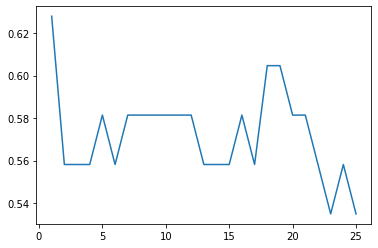

In [32]:
plt.plot(range(1,26), accuracy)

In [47]:
np.sqrt(X_train.shape[0])

13.076696830622021